# Persiapan dataset gambar

In [1]:
import os, sys 
import warnings
import random
warnings.filterwarnings('ignore')
#deklarasi path data gambar yang sudah dilakukan editing sebelumnya
data_dir_list = os.listdir('edited/')
#Cetak nama folder (class) yang ada
print(data_dir_list)
path, dirs, files = next(os.walk("edited/"))
file_count = len(files)

['malam', 'pagi']


In [2]:
datadir = "edited/"

In [3]:
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['pagi','malam']
flat_data_arr=[] #input array
target_arr=[] #output array

In [4]:
#path which contains all the categories of images
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(128,128,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data
df


loading... category : pagi
loaded category:pagi successfully
loading... category : malam
loaded category:malam successfully


,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,Target
0,0.000000,0.011765,0.007843,0.000000,0.011765,0.007843,0.000000,0.011765,0.007843,0.000000,...,0.054902,0.090196,0.086275,0.054902,0.090196,0.086275,0.054902,0.090196,0.086275,0
1,0.000000,0.015686,0.019608,0.000000,0.015686,0.019608,0.000000,0.015686,0.019608,0.000000,...,0.074510,0.121569,0.121569,0.074510,0.121569,0.121569,0.074510,0.121569,0.121569,0
2,0.007843,0.023529,0.035294,0.007843,0.023529,0.035294,0.007843,0.023529,0.035294,0.007843,...,0.074510,0.121569,0.121569,0.074510,0.121569,0.121569,0.078431,0.125490,0.125490,0
3,0.007843,0.027451,0.043137,0.007843,0.027451,0.043137,0.007843,0.027451,0.043137,0.007843,...,0.082353,0.129412,0.129412,0.082353,0.129412,0.129412,0.082353,0.129412,0.129412,0
4,0.007843,0.023529,0.058824,0.007843,0.023529,0.058824,0.007843,0.023529,0.058824,0.007843,...,0.086275,0.129412,0.137255,0.086275,0.129412,0.137255,0.086275,0.129412,0.137255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.027451,0.050980,0.043137,0.027451,0.050980,0.043137,0.027451,0.050980,0.043137,0.027451,...,0.176471,0.231373,0.180392,0.176471,0.231373,0.180392,0.176471,0.231373,0.180392,1
284,0.027451,0.050980,0.043137,0.027451,0.050980,0.043137,0.027451,0.050980,0.043137,0.027451,...,0.180392,0.231373,0.203922,0.176471,0.227451,0.200000,0.172549,0.223529,0.196078,1
285,0.023529,0.047059,0.039216,0.023529,0.047059,0.039216,0.023529,0.047059,0.039216,0.027451,...,0.180392,0.231373,0.192157,0.176471,0.227451,0.188235,0.172549,0.223529,0.184314,1
286,0.027451,0.050980,0.043137,0.027451,0.050980,0.043137,0.027451,0.050980,0.043137,0.027451,...,0.180392,0.231373,0.192157,0.176471,0.227451,0.188235,0.176471,0.227451,0.188235,1


In [9]:
type(y)

pandas.core.series.Series

In [8]:
#Menampilkan jumlah data gambar
for i in ['malam', 'pagi']:
    print('Gambar {} ada : '.format(i)+str(len(os.listdir(datadir+i+'/'))))

Gambar malam ada : 142
Gambar pagi ada : 146


Image Classification with SVM

In [11]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1,10,100,1000],'gamma':[0.0001,0.001,0.1],'kernel':['rbf']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid,verbose=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

print('Splitted Successfully')

Splitted Successfully


In [14]:
model.fit(x_train, y_train)
print('The Model is trained well with the given images')
model.best_params_ # contains the best parameters obtained from GridSearchCV

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The Model is trained well with the given images


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [15]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1]
The actual data is:
[0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1]
The model is 96.55172413793103% accurate


In [16]:
import pickle

filename = "model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(filename, file)
    file.close()

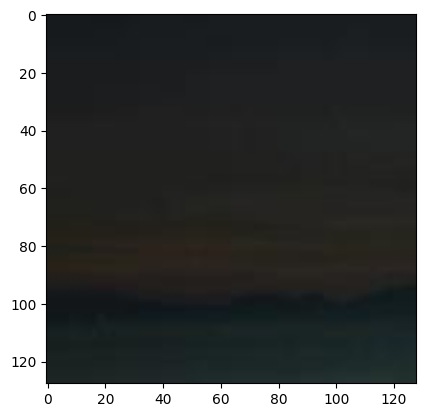

pagi = 99.97194863738555%
malam = 0.02805136261442996%
The predicted image is : pagi


In [20]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(128,128,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : " + Categories[model.predict(l)[0]])